In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/bru/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
films = pd.read_csv('../data/clean/letterboxd_clean_films.csv')
films.head()

letterboxd_id                              title  release_year  \
0        1000001                             Barbie          2023   
1        1000002                           Parasite          2019   
2        1000003  Everything Everywhere All at Once          2022   
3        1000004                         Fight Club          1999   
4        1000005                         La La Land          2016   

                                            tagline  \
0                  She's everything. He's just Ken.   
1                       Act like you own the place.   
2  The universe is so much bigger than you realize.   
3                           Mischief. Mayhem. Soap.   
4                    Here's to the fools who dream.   

                                             summary  runtime  \
0  Barbie and Ken are having the time of their li...      114   
1  All unemployed, Ki-taek's family takes peculia...      133   
2  An aging Chinese immigrant is swept up in an i...      140   
3  A ticking-time-bomb insomniac and a slippery s...      139   
4  Mia, an aspiring actress, serves lattes to mov...      129   

   letterboxd_rating                                      genres  \
0               3.86                           Comedy, Adventure   
1               4.56                     Comedy, Thriller, Drama   
2               4.30  Science Fiction, Adventure, Comedy, Action   
3               4.27                                       Drama   
4               4.09               Drama, Comedy, Music, Romance   

                               language       countries  \
0                               English         UK, USA   
1       Korean, English, German, Korean     South Korea   
2  English, Cantonese, Chinese, English             USA   
3                               English    Germany, USA   
4                               English  Hong Kong, USA   

                                              themes  \
0  ['Humanity and the world around us', 'Crude hu...   
1  ['Humanity and the world around us', 'Intense ...   
2  ['Humanity and the world around us', 'Moving r...   
3  ['Intense violence and sexual transgression', ...   
4  ['Song and dance', 'Humanity and the world aro...   

                        director                           topics  \
0                   Greta Gerwig                              NaN   
1                   Bong Joon-ho                              NaN   
2  Daniel Scheinert, Daniel Kwan                              NaN   
3                  David Fincher                              NaN   
4                Damien Chazelle  167,176,222,260,266,269,339,363   

   doesthedog_id                                             events  \
0       381345.0                                                NaN   
1        19408.0                                                NaN   
2       121671.0                                                NaN   
3         9593.0                                                NaN   
4        12823.0  flashing lights or images, shower scenes, sad ...   

   has_warnings  
0         False  
1         False  
2         False  
3         False  
4          True

In [4]:
cleaned_films = films.copy()
cleaned_films.drop(columns=['topics', 'doesthedog_id', 'letterboxd_id'], inplace=True)

In [5]:
cleaned_films.head()


title  release_year  \
0                             Barbie          2023   
1                           Parasite          2019   
2  Everything Everywhere All at Once          2022   
3                         Fight Club          1999   
4                         La La Land          2016   

                                            tagline  \
0                  She's everything. He's just Ken.   
1                       Act like you own the place.   
2  The universe is so much bigger than you realize.   
3                           Mischief. Mayhem. Soap.   
4                    Here's to the fools who dream.   

                                             summary  runtime  \
0  Barbie and Ken are having the time of their li...      114   
1  All unemployed, Ki-taek's family takes peculia...      133   
2  An aging Chinese immigrant is swept up in an i...      140   
3  A ticking-time-bomb insomniac and a slippery s...      139   
4  Mia, an aspiring actress, serves lattes to mov...      129   

   letterboxd_rating                                      genres  \
0               3.86                           Comedy, Adventure   
1               4.56                     Comedy, Thriller, Drama   
2               4.30  Science Fiction, Adventure, Comedy, Action   
3               4.27                                       Drama   
4               4.09               Drama, Comedy, Music, Romance   

                               language       countries  \
0                               English         UK, USA   
1       Korean, English, German, Korean     South Korea   
2  English, Cantonese, Chinese, English             USA   
3                               English    Germany, USA   
4                               English  Hong Kong, USA   

                                              themes  \
0  ['Humanity and the world around us', 'Crude hu...   
1  ['Humanity and the world around us', 'Intense ...   
2  ['Humanity and the world around us', 'Moving r...   
3  ['Intense violence and sexual transgression', ...   
4  ['Song and dance', 'Humanity and the world aro...   

                        director  \
0                   Greta Gerwig   
1                   Bong Joon-ho   
2  Daniel Scheinert, Daniel Kwan   
3                  David Fincher   
4                Damien Chazelle   

                                              events  has_warnings  
0                                                NaN         False  
1                                                NaN         False  
2                                                NaN         False  
3                                                NaN         False  
4  flashing lights or images, shower scenes, sad ...          True

In [6]:
cleaned_films = cleaned_films.dropna()

In [7]:
cleaned_films.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4203 entries, 4 to 18449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4203 non-null   object 
 1   release_year       4203 non-null   int64  
 2   tagline            4203 non-null   object 
 3   summary            4203 non-null   object 
 4   runtime            4203 non-null   int64  
 5   letterboxd_rating  4203 non-null   float64
 6   genres             4203 non-null   object 
 7   language           4203 non-null   object 
 8   countries          4203 non-null   object 
 9   themes             4203 non-null   object 
 10  director           4203 non-null   object 
 11  events             4203 non-null   object 
 12  has_warnings       4203 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 431.0+ KB


In [8]:
display(cleaned_films)

title  release_year  \
4                         La La Land          2016   
11                          Whiplash          2014   
32     Once Upon a Time in Hollywood          2019   
39                       Glass Onion          2022   
68                              Coco          2017   
...                              ...           ...   
18425                   The Triangle          2001   
18427                            CAT          2022   
18429                         Wraith          2017   
18436                          Tulsa          2020   
18449                 Lies Illusions          2009   

                                                 tagline  \
4                         Here's to the fools who dream.   
11       The road to greatness can take you to the edge.   
32            In this town, it can all change… like that   
39               When the game ends, the mystery begins.   
68                         The celebration of a lifetime   
...                                                  ...   
18425  In the Bermuda Triangle, nothing stays lost fo...   
18427                             Drugs. Deceit. Danger.   
18429                       There's Something in My Room   
18436                 Big changes come in small packages   
18449  A writer, torn between two lovers is hunted by...   

                                                 summary  runtime  \
4      Mia, an aspiring actress, serves lattes to mov...      129   
11     Under the direction of a ruthless instructor, ...      107   
32     Los Angeles, 1969. TV star Rick Dalton, a stru...      162   
39     World-famous detective Benoit Blanc heads to G...      140   
68     Despite his family’s baffling generations-old ...      105   
...                                                  ...      ...   
18425  This made-for-TV movie follows a group of frie...       92   
18427  Living under an alias, a former police informa...      360   
18429  After living in an old mansion for almost 10 y...       99   
18436  A desperate marine biker’s life is turned upsi...      120   
18449  When a menacing smuggler coolly insists that b...       92   

       letterboxd_rating                               genres  \
4                   4.09        Drama, Comedy, Music, Romance   
11                  4.43                         Drama, Music   
32                  3.76              Drama, Thriller, Comedy   
39                  3.45               Comedy, Crime, Mystery   
68                  4.12  Adventure, Animation, Music, Family   
...                  ...                                  ...   
18425               2.89           Thriller, Horror, TV Movie   
18427               3.50                         Crime, Drama   
18429               2.61            Mystery, Thriller, Horror   
18436               2.97                        Comedy, Drama   
18449               2.73             Comedy, Action, Thriller   

                                 language              countries  \
4                                 English         Hong Kong, USA   
11                                English                    USA   
32     English, English, Italian, Spanish         China, UK, USA   
39                                English                    USA   
68              English, English, Spanish                    USA   
...                                   ...                    ...   
18425                             English  USA, Canada, Barbados   
18427                               Hindi                  India   
18429                             English                    USA   
18436                             English                    USA   
18449                             English                    USA   

                                                  themes  \
4      ['Song and dance', 'Humanity and the world aro...   
11     ['Moving relationship stories', 'Student comin...   
32     ['Humanity and the world around us', 'Fascinat.

#### Preprocess Text Data
- Clean the text by removing irrelevant characters, stopwords, and converting text to lowercase.
- Handle missing values in columns like genres, events, summary, etc.
- Tokenize the text and split genres by commas if necessary.

In [9]:
def clean_title(title):
    if isinstance(title, str):  
        title = title.strip() 
        title = re.sub(r'\s+', ' ', title)  
        title = re.sub(
            r'[^\w\sàáâäãåçèéêëìíîïñòóôöõùúûüýÿÀÁÂÄÃÅÇÈÉÊËÌÍÎÏÑÒÓÔÖÕÙÚÛÜÝ]', '', title
        )
        return title
    return None 


# Apply cleaning function to relevant columns using .loc to avoid SettingWithCopyWarning
cleaned_films.loc[:, 'title'] = cleaned_films['title'].apply(clean_title)
cleaned_films.loc[:, 'summary'] = cleaned_films['summary'].apply(clean_title)


In [10]:
display(cleaned_films)

title  release_year  \
4                         La La Land          2016   
11                          Whiplash          2014   
32     Once Upon a Time in Hollywood          2019   
39                       Glass Onion          2022   
68                              Coco          2017   
...                              ...           ...   
18425                   The Triangle          2001   
18427                            CAT          2022   
18429                         Wraith          2017   
18436                          Tulsa          2020   
18449                 Lies Illusions          2009   

                                                 tagline  \
4                         Here's to the fools who dream.   
11       The road to greatness can take you to the edge.   
32            In this town, it can all change… like that   
39               When the game ends, the mystery begins.   
68                         The celebration of a lifetime   
...                                                  ...   
18425  In the Bermuda Triangle, nothing stays lost fo...   
18427                             Drugs. Deceit. Danger.   
18429                       There's Something in My Room   
18436                 Big changes come in small packages   
18449  A writer, torn between two lovers is hunted by...   

                                                 summary  runtime  \
4      Mia an aspiring actress serves lattes to movie...      129   
11     Under the direction of a ruthless instructor a...      107   
32     Los Angeles 1969 TV star Rick Dalton a struggl...      162   
39     Worldfamous detective Benoit Blanc heads to Gr...      140   
68     Despite his familys baffling generationsold ba...      105   
...                                                  ...      ...   
18425  This madeforTV movie follows a group of friend...       92   
18427  Living under an alias a former police informan...      360   
18429  After living in an old mansion for almost 10 y...       99   
18436  A desperate marine bikers life is turned upsid...      120   
18449  When a menacing smuggler coolly insists that b...       92   

       letterboxd_rating                               genres  \
4                   4.09        Drama, Comedy, Music, Romance   
11                  4.43                         Drama, Music   
32                  3.76              Drama, Thriller, Comedy   
39                  3.45               Comedy, Crime, Mystery   
68                  4.12  Adventure, Animation, Music, Family   
...                  ...                                  ...   
18425               2.89           Thriller, Horror, TV Movie   
18427               3.50                         Crime, Drama   
18429               2.61            Mystery, Thriller, Horror   
18436               2.97                        Comedy, Drama   
18449               2.73             Comedy, Action, Thriller   

                                 language              countries  \
4                                 English         Hong Kong, USA   
11                                English                    USA   
32     English, English, Italian, Spanish         China, UK, USA   
39                                English                    USA   
68              English, English, Spanish                    USA   
...                                   ...                    ...   
18425                             English  USA, Canada, Barbados   
18427                               Hindi                  India   
18429                             English                    USA   
18436                             English                    USA   
18449                             English                    USA   

                                                  themes  \
4      ['Song and dance', 'Humanity and the world aro...   
11     ['Moving relationship stories', 'Student comin...   
32     ['Humanity and the world around us', 'Fascinat.

### Sentiment Analysis

1. Exploding Columns with Multiple Values

In [11]:
# Split the 'genres' column by commas into lists
cleaned_films['genres'] = cleaned_films['genres'].str.split(',')

# Exploding the genres column to separate each genre into a separate row
films_exploded_genres = cleaned_films.explode('genres')

# Check the result of the explosion for 'genres'
films_exploded_genres[['title', 'genres']].head()

title    genres
4   La La Land     Drama
4   La La Land    Comedy
4   La La Land     Music
4   La La Land   Romance
11    Whiplash     Drama

In [12]:
# Split the 'language' column by commas into lists
cleaned_films['language'] = cleaned_films['language'].str.split(',')

# Exploding the language column to separate each language into a separate row
films_exploded_languages = cleaned_films.explode('language')

# Check the result of the explosion for 'language'
films_exploded_languages[['title', 'language']].head()

title  language
4                      La La Land   English
11                       Whiplash   English
32  Once Upon a Time in Hollywood   English
32  Once Upon a Time in Hollywood   English
32  Once Upon a Time in Hollywood   Italian

In [13]:
# Split the 'countries' column by commas into lists
cleaned_films['countries'] = cleaned_films['countries'].str.split(',')

# Exploding the countries column to separate each country into a separate row
films_exploded_countries = cleaned_films.explode('countries')

# Check the result of the explosion for 'countries'
films_exploded_countries[['title', 'countries']].head()

title  countries
4                      La La Land  Hong Kong
4                      La La Land        USA
11                       Whiplash        USA
32  Once Upon a Time in Hollywood      China
32  Once Upon a Time in Hollywood         UK

In [14]:
# Split the 'events' column by commas into lists
cleaned_films['events'] = cleaned_films['events'].str.split(',')

# Exploding the events column to separate each event into a separate row
films_exploded_events = cleaned_films.explode('events')

# Check the result of the explosion for 'events'
films_exploded_events[['title', 'events']].head()

title                     events
4  La La Land  flashing lights or images
4  La La Land              shower scenes
4  La La Land                sad endings
4  La La Land                 misophonia
4  La La Land              babies/unborn

In [15]:
# Exploding the 'themes' column (which is already a list)
cleaned_films['themes'] = cleaned_films['themes'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Exploding the themes column to separate each theme into a separate row
films_exploded_themes = cleaned_films.explode('themes')

# Check the result of the explosion for 'themes'
films_exploded_themes[['title', 'themes']].head()

title                                          themes
4  La La Land                                  Song and dance
4  La La Land                Humanity and the world around us
4  La La Land                     Moving relationship stories
4  La La Land        Dazzling vocal performances and musicals
4  La La Land  Captivating relationships and charming romance

2. Sentiment Analysis on Exploded DFs

In [16]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score for a text
def get_sentiment_score(text):
    if isinstance(text, str):  # Check if the text is a valid string
        return sia.polarity_scores(text)['compound']
    return 0  # Return a neutral sentiment score if text is not valid

# Apply sentiment analysis on 'title', 'summary', and 'tagline' for exploded dataframes
films_exploded_genres['sentiment_title'] = films_exploded_genres['title'].apply(get_sentiment_score)
films_exploded_genres['sentiment_summary'] = films_exploded_genres['summary'].apply(get_sentiment_score)
films_exploded_genres['sentiment_tagline'] = films_exploded_genres['tagline'].apply(get_sentiment_score)

In [17]:
films_exploded_languages['sentiment_title'] = films_exploded_languages['title'].apply(get_sentiment_score)
films_exploded_languages['sentiment_summary'] = films_exploded_languages['summary'].apply(get_sentiment_score)
films_exploded_languages['sentiment_tagline'] = films_exploded_languages['tagline'].apply(get_sentiment_score)

In [18]:
films_exploded_countries['sentiment_title'] = films_exploded_countries['title'].apply(get_sentiment_score)
films_exploded_countries['sentiment_summary'] = films_exploded_countries['summary'].apply(get_sentiment_score)
films_exploded_countries['sentiment_tagline'] = films_exploded_countries['tagline'].apply(get_sentiment_score)

In [19]:
films_exploded_events['sentiment_title'] = films_exploded_events['title'].apply(get_sentiment_score)
films_exploded_events['sentiment_summary'] = films_exploded_events['summary'].apply(get_sentiment_score)
films_exploded_events['sentiment_tagline'] = films_exploded_events['tagline'].apply(get_sentiment_score)

In [20]:
films_exploded_themes['sentiment_title'] = films_exploded_themes['title'].apply(get_sentiment_score)
films_exploded_themes['sentiment_summary'] = films_exploded_themes['summary'].apply(get_sentiment_score)
films_exploded_themes['sentiment_tagline'] = films_exploded_themes['tagline'].apply(get_sentiment_score)

3. Combine Sentiment Scores for Each Exploded DataFrame

In [21]:
films_exploded_genres['overall_sentiment'] = (
    films_exploded_genres['sentiment_title'] + 
    films_exploded_genres['sentiment_summary'] + 
    films_exploded_genres['sentiment_tagline']
) / 3

films_exploded_genres[['title', 'genres', 'overall_sentiment']].head()

title    genres  overall_sentiment
4   La La Land     Drama           0.203733
4   La La Land    Comedy           0.203733
4   La La Land     Music           0.203733
4   La La Land   Romance           0.203733
11    Whiplash     Drama           0.263533

In [22]:
films_exploded_languages['overall_sentiment'] = (
    films_exploded_languages['sentiment_title'] + 
    films_exploded_languages['sentiment_summary'] + 
    films_exploded_languages['sentiment_tagline']
) / 3

films_exploded_languages[['title', 'language', 'overall_sentiment']].head()

title  language  overall_sentiment
4                      La La Land   English           0.203733
11                       Whiplash   English           0.263533
32  Once Upon a Time in Hollywood   English           0.389533
32  Once Upon a Time in Hollywood   English           0.389533
32  Once Upon a Time in Hollywood   Italian           0.389533

In [23]:
films_exploded_countries['overall_sentiment'] = (
    films_exploded_countries['sentiment_title'] + 
    films_exploded_countries['sentiment_summary'] + 
    films_exploded_countries['sentiment_tagline']
) / 3

films_exploded_countries[['title', 'countries', 'overall_sentiment']].head()

title  countries  overall_sentiment
4                      La La Land  Hong Kong           0.203733
4                      La La Land        USA           0.203733
11                       Whiplash        USA           0.263533
32  Once Upon a Time in Hollywood      China           0.389533
32  Once Upon a Time in Hollywood         UK           0.389533

In [24]:
films_exploded_events['overall_sentiment'] = (
    films_exploded_events['sentiment_title'] + 
    films_exploded_events['sentiment_summary'] + 
    films_exploded_events['sentiment_tagline']
) / 3

films_exploded_events[['title', 'events', 'overall_sentiment']].head()

title                     events  overall_sentiment
4  La La Land  flashing lights or images           0.203733
4  La La Land              shower scenes           0.203733
4  La La Land                sad endings           0.203733
4  La La Land                 misophonia           0.203733
4  La La Land              babies/unborn           0.203733

In [25]:


films_exploded_themes['overall_sentiment'] = (
    films_exploded_themes['sentiment_title'] + 
    films_exploded_themes['sentiment_summary'] + 
    films_exploded_themes['sentiment_tagline']
) / 3

films_exploded_themes[['title', 'themes', 'overall_sentiment']].head()

title                                          themes  \
4  La La Land                                  Song and dance   
4  La La Land                Humanity and the world around us   
4  La La Land                     Moving relationship stories   
4  La La Land        Dazzling vocal performances and musicals   
4  La La Land  Captivating relationships and charming romance   

   overall_sentiment  
4           0.203733  
4           0.203733  
4           0.203733  
4           0.203733  
4           0.203733

4. Visualizing Sentiment vs. Rating

Sentiment vs. Rating for Genres

In [26]:
# Visualize sentiment vs. rating for genres
fig = px.box(films_exploded_genres, 
             x='genres', 
             y='overall_sentiment', 
             title='Sentiment Distribution by Genre',
             labels={'genres': 'Genre', 'overall_sentiment': 'Overall Sentiment'})

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()

Sentiment vs. Rating for Languages

In [27]:
# Visualize sentiment vs. rating for languages
fig = px.box(films_exploded_languages, 
             x='language', 
             y='overall_sentiment', 
             title='Sentiment Distribution by Language',
             labels={'language': 'Language', 'overall_sentiment': 'Overall Sentiment'})

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()


Sentiment vs. Rating for Events

In [28]:
# Visualize sentiment vs. rating for events
fig = px.box(films_exploded_events, 
             x='events', 
             y='overall_sentiment', 
             title='Sentiment Distribution by Events',
             labels={'events': 'Event', 'overall_sentiment': 'Overall Sentiment'})

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()


Sentiment vs. Rating for Themes

In [29]:
# Visualize sentiment vs. rating for themes
fig = px.box(films_exploded_themes, 
             x='themes', 
             y='overall_sentiment', 
             title='Sentiment Distribution by Themes',
             labels={'themes': 'Theme', 'overall_sentiment': 'Overall Sentiment'})

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()


To understand how factors like themes, events, genres, and whether a title has warnings (has_warnings) impact the rating (letterboxd_rating), we can use statistical or machine learning techniques to analyze the relationships between these variables and the letterboxd_rating.

In [30]:
# Exploding the 'themes', 'genres', and 'events' columns into individual rows
films_exploded_themes = cleaned_films.copy()
films_exploded_themes['themes'] = films_exploded_themes['themes'].apply(lambda x: x if isinstance(x, list) else [])
films_exploded_themes = films_exploded_themes.explode('themes')

films_exploded_genres = cleaned_films.copy()
films_exploded_genres['genres'] = films_exploded_genres['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
films_exploded_genres = films_exploded_genres.explode('genres')

films_exploded_events = cleaned_films.copy()
films_exploded_events['events'] = films_exploded_events['events'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
films_exploded_events = films_exploded_events.explode('events')

Encoding Categorical Variables

In [31]:
# One-hot encoding the exploded themes, genres, and events columns
films_exploded_themes_encoded = pd.get_dummies(films_exploded_themes, columns=['themes'])
films_exploded_genres_encoded = pd.get_dummies(films_exploded_genres, columns=['genres'])
films_exploded_events_encoded = pd.get_dummies(films_exploded_events, columns=['events'])

# Encode the 'has_warnings' column (True/False to 1/0)
films_exploded_themes_encoded['has_warnings'] = films_exploded_themes_encoded['has_warnings'].astype(int)

# Merge the exploded dataframes (themes, genres, events)
films_exploded_merged = pd.merge(films_exploded_themes_encoded, films_exploded_genres_encoded, how='inner', on=['title', 'release_year', 'letterboxd_rating'])
films_exploded_merged = pd.merge(films_exploded_merged, films_exploded_events_encoded, how='inner', on=['title', 'release_year', 'letterboxd_rating'])

films_exploded_merged.head()

title  release_year                       tagline_x  \
0  La La Land          2016  Here's to the fools who dream.   
1  La La Land          2016  Here's to the fools who dream.   
2  La La Land          2016  Here's to the fools who dream.   
3  La La Land          2016  Here's to the fools who dream.   
4  La La Land          2016  Here's to the fools who dream.   

                                           summary_x  runtime_x  \
0  Mia an aspiring actress serves lattes to movie...        129   
1  Mia an aspiring actress serves lattes to movie...        129   
2  Mia an aspiring actress serves lattes to movie...        129   
3  Mia an aspiring actress serves lattes to movie...        129   
4  Mia an aspiring actress serves lattes to movie...        129   

   letterboxd_rating                            genres_x language_x  \
0               4.09  [Drama,  Comedy,  Music,  Romance]  [English]   
1               4.09  [Drama,  Comedy,  Music,  Romance]  [English]   
2               4.09  [Drama,  Comedy,  Music,  Romance]  [English]   
3               4.09  [Drama,  Comedy,  Music,  Romance]  [English]   
4               4.09  [Drama,  Comedy,  Music,  Romance]  [English]   

         countries_x       director_x  ... has_warnings_y  \
0  [Hong Kong,  USA]  Damien Chazelle  ...           True   
1  [Hong Kong,  USA]  Damien Chazelle  ...           True   
2  [Hong Kong,  USA]  Damien Chazelle  ...           True   
3  [Hong Kong,  USA]  Damien Chazelle  ...           True   
4  [Hong Kong,  USA]  Damien Chazelle  ...           True   

                          tagline  \
0  Here's to the fools who dream.   
1  Here's to the fools who dream.   
2  Here's to the fools who dream.   
3  Here's to the fools who dream.   
4  Here's to the fools who dream.   

                                             summary  runtime  \
0  Mia an aspiring actress serves lattes to movie...      129   
1  Mia an aspiring actress serves lattes to movie...      129   
2  Mia an aspiring actress serves lattes to movie...      129   
3  Mia an aspiring actress serves lattes to movie...      129   
4  Mia an aspiring actress serves lattes to movie...      129   

                             genres_y   language          countries  \
0  [Drama,  Comedy,  Music,  Romance]  [English]  [Hong Kong,  USA]   
1  [Drama,  Comedy,  Music,  Romance]  [English]  [Hong Kong,  USA]   
2  [Drama,  Comedy,  Music,  Romance]  [English]  [Hong Kong,  USA]   
3  [Drama,  Comedy,  Music,  Romance]  [English]  [Hong Kong,  USA]   
4  [Drama,  Comedy,  Music,  Romance]  [English]  [Hong Kong,  USA]   

                                            themes_y         director  \
0  [Song and dance, Humanity and the world around...  Damien Chazelle   
1  [Song and dance, Humanity and the world around...  Damien Chazelle   
2  [Song and dance, Humanity and the world around...  Damien Chazelle   
3  [Song and dance, Humanity and the world around...  Damien Chazelle   
4  [Song and dance, Humanity and the world around...  Damien Chazelle   

   has_warnings  
0          True  
1          True  
2          True  
3          True  
4          True  

[5 rows x 139 columns]

Correlation and Feature Importance

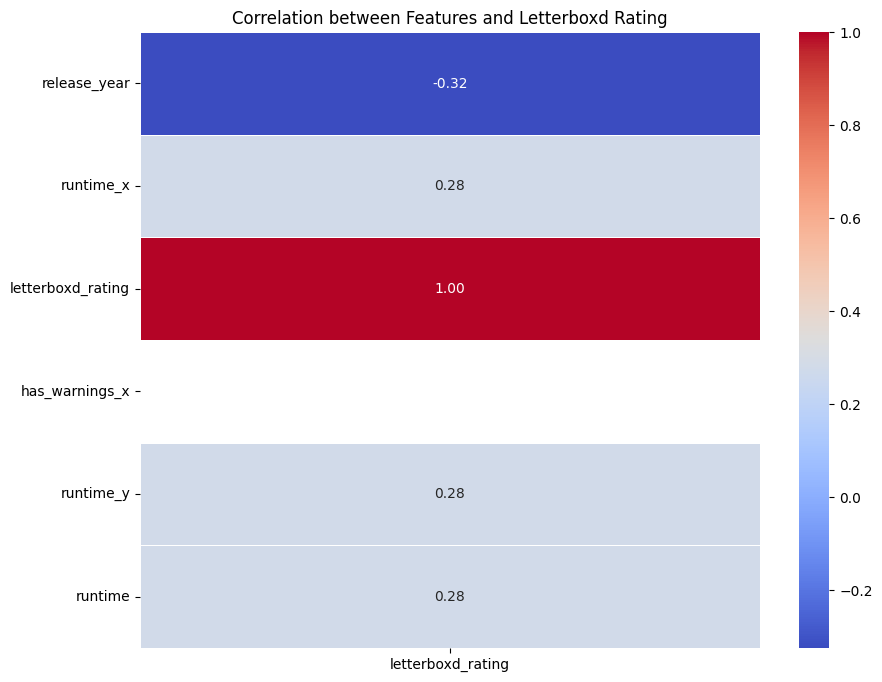

In [32]:
# Select only numeric columns for correlation
numeric_columns = films_exploded_merged.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns only
correlation_matrix = films_exploded_merged[numeric_columns].corr()

# Visualize the correlation matrix for the 'letterboxd_rating'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['letterboxd_rating']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Features and Letterboxd Rating")
plt.show()

Feature Importance with Random Forest

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [39]:
cleaned_films.info()  # Check the structure of cleaned_films


<class 'pandas.core.frame.DataFrame'>
Index: 4203 entries, 4 to 18449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4203 non-null   object 
 1   release_year       4203 non-null   int64  
 2   tagline            4203 non-null   object 
 3   summary            4203 non-null   object 
 4   runtime            4203 non-null   int64  
 5   letterboxd_rating  4203 non-null   float64
 6   genres             4203 non-null   object 
 7   language           4203 non-null   object 
 8   countries          4203 non-null   object 
 9   themes             4203 non-null   object 
 10  director           4203 non-null   object 
 11  events             4203 non-null   object 
 12  has_warnings       4203 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 431.0+ KB


Step 1: Process the 'themes' column (If It's a List)

In [40]:
# Check the first few entries in the 'themes' column to ensure it's a list of themes
cleaned_films['themes'].head()


4     [Song and dance, Humanity and the world around...
11    [Moving relationship stories, Student coming-o...
32    [Humanity and the world around us, Fascinating...
39    [Thrillers and murder mysteries, Intriguing an...
68    [Moving relationship stories, Song and dance, ...
Name: themes, dtype: object

Step 2: Preprocess Categorical Features (Multiple Values per Row)

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Ensure 'genres' is a list of strings (if it's not already)
# If it's already a list of genres, you can skip this part
# cleaned_films['genres'] = cleaned_films['genres'].apply(lambda x: x.split(', '))

# Step 2: Apply MultiLabelBinarizer to the 'genres' column
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(cleaned_films['genres'])

# Step 3: Create a DataFrame with the binary features for genres
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Step 4: Concatenate the genres_df with cleaned_films
cleaned_films_with_genres = pd.concat([cleaned_films, genres_df], axis=1)


In [51]:
# Step 1: Check for missing values in 'language' column
cleaned_films_with_genres['language'].isnull().sum()

# Step 2: If there are missing values, fill them with an empty list (or drop rows)
cleaned_films_with_genres['language'] = cleaned_films_with_genres['language'].apply(
    lambda x: x if isinstance(x, list) else []
)

# Step 3: Apply MultiLabelBinarizer to the 'language' column
mlb = MultiLabelBinarizer()
language_encoded = mlb.fit_transform(cleaned_films_with_genres['language'])

# Step 4: Create a DataFrame with the binary features for languages
language_df = pd.DataFrame(language_encoded, columns=mlb.classes_)

# Step 5: Concatenate the language_df with cleaned_films_with_genres
cleaned_films_with_genres_language = pd.concat([cleaned_films_with_genres, language_df], axis=1)


In [52]:
# Step 1: Split countries by commas and convert to lists
cleaned_films_with_genres_language['countries'] = cleaned_films_with_genres_language['countries'].apply(lambda x: x.split(', '))

# Step 2: Apply MultiLabelBinarizer to the countries column
countries_encoded = mlb.fit_transform(cleaned_films_with_genres_language['countries'])

# Step 3: Create a DataFrame with the binary features for countries
countries_df = pd.DataFrame(countries_encoded, columns=mlb.classes_)

# Step 4: Concatenate the countries_df with cleaned_films
cleaned_films_with_all_categorical = pd.concat([cleaned_films_with_genres_language, countries_df], axis=1)


AttributeError: 'list' object has no attribute 'split'